# Lauren Friend COMS 4995 Homework 2, Task 1
02/11/2020

In [2]:
#Import Packages

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn import neighbors, datasets
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Load the Data as a pd DataFrame
dataset = sklearn.datasets.fetch_openml(name='credit-g', as_frame=True)
df = dataset.data
target = dataset.target
num_good = 0
for item in target:
    if item == 'good':
        num_good+=1
num_bad = len(target)-num_good

# Task 1.1 determining the continuous vs. categorical features

In [4]:
# Showing which categories are continuous v. categorical. Categorical variables show as True
tf = df.dtypes=='category'
tf

checking_status            True
duration                  False
credit_history             True
purpose                    True
credit_amount             False
savings_status             True
employment                 True
installment_commitment    False
personal_status            True
other_parties              True
residence_since           False
property_magnitude         True
age                       False
other_payment_plans        True
housing                    True
existing_credits          False
job                        True
num_dependents            False
own_telephone              True
foreign_worker             True
dtype: bool

In [5]:
#Make a list of all of the categorical variables
categorical_list = []
numeric_list = []
for column in df.columns:
    if df[column].dtypes != np.float64:
        categorical_list.append(column)
    else:
        numeric_list.append(column)

# Task 1.2 visualizing the distribution of continuous features & target

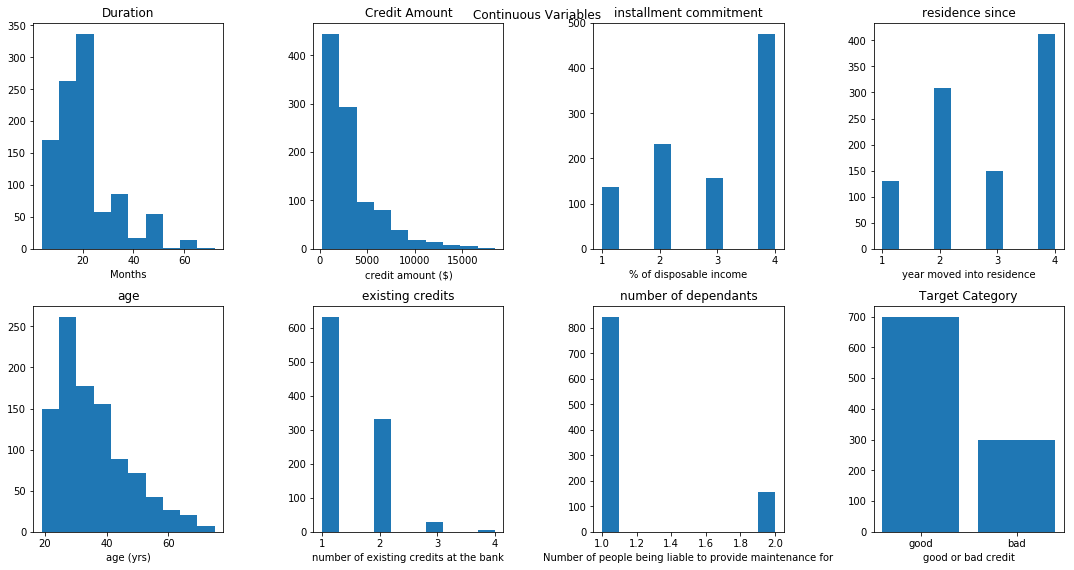

In [6]:
#1.2: Histograms of all continuous variables
fig1, ax = plt.subplots(2,4, figsize=(15,8))
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8 =ax.ravel()
ax1.hist(df['duration'])
ax1.set_xlabel('Months')
ax1.set_title('Duration')
ax2.hist(df['credit_amount'])
ax2.set_xlabel('credit amount ($)')
ax2.set_title('Credit Amount')
ax3.hist(df['installment_commitment'])
ax3.set_xlabel('% of disposable income')
ax3.set_title('installment commitment')
ax4.hist(df['residence_since'])
ax4.set_xlabel('year moved into residence')
ax4.set_title('residence since')
ax5.hist(df['age'])
ax5.set_xlabel('age (yrs)')
ax5.set_title('age')
ax6.hist(df['existing_credits'])
ax6.set_xlabel('number of existing credits at the bank')
ax6.set_title('existing credits')
ax7.hist(df['num_dependents'])
ax7.set_xlabel('Number of people being liable to provide maintenance for')
ax7.set_title('number of dependants')
ax8.bar(['good','bad'], (num_good, num_bad))
ax8.set_xlabel('good or bad credit')
ax8.set_title('Target Category')
fig1.suptitle("Continuous Variables")
fig1.tight_layout(pad=1)

# 1.3 Splitting the data, encoding, testing a LogisticRegression

In [7]:
#label encode the target (preprocess without pipeline)
labelencoder = preprocessing.LabelEncoder()
target=labelencoder.fit_transform(target)

In [8]:
#split the data into training and test, then split that into train-test-validate
X_trainval, X_test, y_trainval, y_test = train_test_split(df, target, stratify=target, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

In [9]:
#onehotencoder for categorical variables
#creade a new df object for training and test sets
ohe_df_Xtrain = pd.get_dummies(X_train, columns=categorical_list)
ohe_df_Xval = pd.get_dummies(X_val, columns=categorical_list)

In [10]:
#Evaluate a LogisticRegression() model 
linreg=LogisticRegression(max_iter=1000)
linreg.fit(ohe_df_Xtrain,y_train)
linreg.score(ohe_df_Xval,y_val)

0.7446808510638298

# Task 1.4
1. use column transformer and pipeline to work with categorical variables.
2. using cross-validation, evaluate using Logistic Regression, linear SVM, and nearest neighbors.
3. evaluate.
4. now, do the same process with StandardScaler and evaluate the difference. 

In [11]:
# create the pipeline and the column transformer
columntransformer = ColumnTransformer([('encoder', OneHotEncoder(), categorical_list)], remainder='passthrough')
log_pipeline = make_pipeline(columntransformer, LogisticRegression(max_iter=10000))
lin_pipeline = make_pipeline(columntransformer, sklearn.svm.LinearSVC(max_iter=10000, dual=False))
neighbor_pipeline = make_pipeline(columntransformer, neighbors.KNeighborsClassifier())

In [12]:
# Logistic Regression cross-validation
log_scores= cross_val_score(log_pipeline,X_trainval,y_trainval, cv=10)
print(f'mean score is {log_scores.mean()}, the std is {log_scores.std()}' )

mean score is 0.748, the std is 0.0419311605160437


In [13]:
#Linear Support Vector Machines cross-validation
lin_scores = cross_val_score(lin_pipeline,X_trainval,y_trainval, cv=10)
print(f'mean score is {lin_scores.mean()}, the std is {lin_scores.std()}' )

mean score is 0.748, the std is 0.041505019776729025


In [14]:
#K nearest neighbors cross-validation
neighbor_scores = cross_val_score(neighbor_pipeline,X_trainval,y_trainval, cv=10)
print(f'mean score is {neighbor_scores.mean()}, the std is {neighbor_scores.std()}' )

mean score is 0.6573333333333334, the std is 0.0404639757479827


In [15]:
# Repeating process with standard scalar
#creating a new column transformer that encodes categorical and scales continuous variables
scaled_columntransformer= ColumnTransformer([('encoder', OneHotEncoder(), categorical_list),('standardscalar', StandardScaler(), numeric_list)], remainder='passthrough')
log_scale_pipeline = make_pipeline(scaled_columntransformer, LogisticRegression(max_iter=10000))
lin_scale_pipeline = make_pipeline(scaled_columntransformer, sklearn.svm.LinearSVC(max_iter=10000, dual=False))
neighbor_scale_pipeline = make_pipeline(scaled_columntransformer, neighbors.KNeighborsClassifier())

In [16]:
# Logistic Regression cross-validation with scaling
log_scale_scores= cross_val_score(log_scale_pipeline,X_trainval,y_trainval, cv=10)
print(f'mean score is {log_scale_scores.mean()}, the std is {log_scale_scores.std()}')

mean score is 0.7453333333333334, the std is 0.04440220214759123


In [17]:
# Linear SVM cross-validation with scaling
lin_scale_scores= cross_val_score(lin_scale_pipeline,X_trainval,y_trainval, cv=10)
print(f'mean score is {lin_scale_scores.mean()}, the std is {lin_scale_scores.std()}')

mean score is 0.744, the std is 0.03900997023554081


In [18]:
# KNearestNeighbors cross-validation with scaling
neighbor_scale_scores= cross_val_score(neighbor_scale_pipeline,X_trainval,y_trainval, cv=10)
print(f'mean score is {neighbor_scale_scores.mean()}, the std is {neighbor_scale_scores.std()}')

mean score is 0.7333333333333333, the std is 0.031552425509864604


# 1.4 Results and Reflection
The results are not very different when using StandardScalar() with the exception of the KNearestNeighbors() classifier. This is likely because this classifier is the most sensetive to scaling, as it uses the euclidian length. Therefore, using StandardScalar on KNearestNeighbors greatly improved the score. The scores for logistic regression and linearSVM increased, but only slightly. 

# Task 1.5 Tuning the parameters using GridSearchCV

In [ ]:
for k in lin_scale_pipeline.get_params().keys():
    print(k)

In [19]:
#Choosing the parameters to tune
logistic_grid = {'logisticregression__C':np.arange(.1,10,.1)}
neighbors_grid = {'kneighborsclassifier__n_neighbors':np.arange(1,150,1)} #classifier
linearSVC_grid = {'linearsvc__C':np.arange(.001,3,.01)}

In [20]:
#GridSearchCV for logistic regression
log_grid = GridSearchCV(log_scale_pipeline, logistic_grid, cv=10)
log_grid.fit(X_trainval, y_trainval)
print(log_grid.best_params_)
print(log_grid.best_score_)

{'logisticregression__C': 0.1}
0.7479999999999999


In [21]:
#GridSearchCV for Linear SVM
lin_grid = GridSearchCV(lin_scale_pipeline, linearSVC_grid, cv=10)
lin_grid.fit(X_trainval, y_trainval)
print(lin_grid.best_params_)
print(lin_grid.best_score_)

{'linearsvc__C': 0.11099999999999999}
0.7493333333333334


In [22]:
#GridSearchCV for KNearestNeighbors
nbr_grid = GridSearchCV(neighbor_scale_pipeline, neighbors_grid, cv=10)
nbr_grid.fit(X_trainval, y_trainval)
print(nbr_grid.best_params_)
print(nbr_grid.best_score_)

{'kneighborsclassifier__n_neighbors': 5}
0.7333333333333333


The Results stay about the same, with small improvements on all 3 models. The best performing model was linear SVM, so that model will be used on the test set. 

In [23]:
#Evaluating the best model (SVM) on the test set

lin_grid.score(X_test,y_test)

0.764

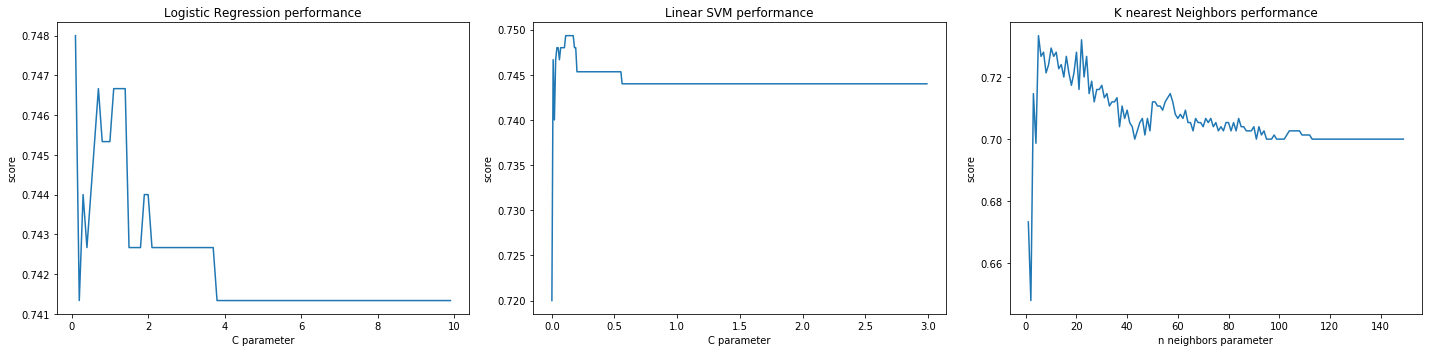

In [27]:
#Visualize the performance as a function of parameters for log, lin, neighbors
lin_performance = lin_grid.cv_results_['mean_test_score']
lin_params = lin_grid.param_grid['linearsvc__C']

log_performance = log_grid.cv_results_['mean_test_score']
log_params = log_grid.param_grid['logisticregression__C']

neighbor_performance = nbr_grid.cv_results_['mean_test_score']
neighbor_params = nbr_grid.param_grid['kneighborsclassifier__n_neighbors']

fig2, ax = plt.subplots(1,3,figsize=(20,5))
ax1,ax2,ax3 = ax.ravel()

ax1.plot(log_params, log_performance)
ax1.set_title("Logistic Regression performance")
ax1.set_xlabel("C parameter")
ax1.set_ylabel('score')
#ax1.set_ylim(bottom=.75)

ax2.plot(lin_params, lin_performance)
ax2.set_title("Linear SVM performance")
ax2.set_xlabel("C parameter")
ax2.set_ylabel('score')
#ax2.set_ylim(bottom=.75)

ax3.plot(neighbor_params, neighbor_performance)
ax3.set_title("K nearest Neighbors performance")
ax3.set_xlabel("n neighbors parameter")
ax3.set_ylabel('score')
#ax3.set_ylim(top=.68)

fig2.tight_layout()

# 1.6 Change the cross-validation strategy 

from ‘stratified k-fold’ to ‘kfold’ with shuffling. 
Do the parameters that are found change? Do they change if you change the random seed of the
shuffling? Or if you change the random state of the split into training and test data?

In [28]:
kfold = sklearn.model_selection.KFold(n_splits=10, shuffle=True)
# skfold = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True)
# use cv=kfold 

In [29]:
#GridSearchCV for logistic regression
kfold_log_grid = GridSearchCV(log_scale_pipeline, logistic_grid, cv=kfold)
kfold_log_grid.fit(X_trainval, y_trainval)
print(log_grid.best_params_)
print(log_grid.best_score_)

{'logisticregression__C': 0.1}
0.7479999999999999


In [30]:
#GridSearchCV for Linear SVM
kfold_lin_grid = GridSearchCV(lin_scale_pipeline, linearSVC_grid, cv=kfold)
kfold_lin_grid.fit(X_trainval, y_trainval)
print(lin_grid.best_params_)
print(lin_grid.best_score_)

{'linearsvc__C': 0.11099999999999999}
0.7493333333333334


In [31]:
#GridSearchCV for KNearestNeighbors
kfold_nbr_grid = GridSearchCV(neighbor_scale_pipeline, neighbors_grid, cv=kfold)
kfold_nbr_grid.fit(X_trainval, y_trainval)
print(nbr_grid.best_params_)
print(nbr_grid.best_score_)

{'kneighborsclassifier__n_neighbors': 5}
0.7333333333333333


The parameters that are found do not change when change when changing from stratefied kfold to kfold with shuffling

Changing the random seed of the suffling

In [32]:
rskfold = sklearn.model_selection.KFold(n_splits=10, shuffle=True, random_state = 12)

In [33]:
#GridSearchCV for logistic regression
rnkfold_log_grid = GridSearchCV(log_scale_pipeline, logistic_grid, cv=rskfold)
rnkfold_log_grid.fit(X_trainval, y_trainval)
print(log_grid.best_params_)
print(log_grid.best_score_)

{'logisticregression__C': 0.1}
0.7479999999999999


In [34]:
#GridSearchCV for Linear SVM
rnkfold_lin_grid = GridSearchCV(lin_scale_pipeline, linearSVC_grid, cv=rskfold)
rnkfold_lin_grid.fit(X_trainval, y_trainval)
print(lin_grid.best_params_)
print(lin_grid.best_score_)

{'linearsvc__C': 0.11099999999999999}
0.7493333333333334


In [43]:
#GridSearchCV for KNearestNeighbors
rnkfold_nbr_grid = GridSearchCV(neighbor_scale_pipeline, neighbors_grid, cv=rskfold)
rnkfold_nbr_grid.fit(X_trainval, y_trainval)
print(nbr_grid.best_params_)
print(nbr_grid.best_score_)

{'kneighborsclassifier__n_neighbors': 16}
0.7386666666666667


changing the random state of the shuffling did not change the results or the parameters. 

changing the random state of the split into training and testing data

In [35]:
#changing the random state of the data splitting
X_random_trainval, X_random_test, y_random_trainval, y_random_test = train_test_split(df, target, stratify=target, random_state=10)

In [36]:
#GridSearchCV for logistic regression
log_grid = GridSearchCV(log_scale_pipeline, logistic_grid, cv=10)
log_grid.fit(X_random_trainval, y_random_trainval)
print(log_grid.best_params_)
print(log_grid.best_score_)

{'logisticregression__C': 0.1}
0.76


In [37]:
#GridSearchCV for Linear SVM
lin_grid = GridSearchCV(lin_scale_pipeline, linearSVC_grid, cv=10)
lin_grid.fit(X_random_trainval, y_random_trainval)
print(lin_grid.best_params_)
print(lin_grid.best_score_)

{'linearsvc__C': 0.20099999999999996}
0.76


In [38]:
#GridSearchCV for KNearestNeighbors
nbr_grid = GridSearchCV(neighbor_scale_pipeline, neighbors_grid, cv=10)
nbr_grid.fit(X_random_trainval, y_random_trainval)
print(nbr_grid.best_params_)
print(nbr_grid.best_score_)

{'kneighborsclassifier__n_neighbors': 12}
0.74


changing the random state of the split did change the results. The parameters for lnear SVM and nearesr neighbors both changed. This also changed the score, with SVM increasing and nearest neighbors decreasing. it is reasonable for nearest neighbors to have a shift like this when the data is split differently, because there are different datapoints that are being compared by euclidian length.

cv was set to 10 for convenience as the previous module showed that there was no difference between cv=10 and cv=kfold

# 1.7 Visualizing the most important parameters
Visualize the 20 most important coefficients for LogisticRegression and Linear Support Vector Machines using hyper-parameters that performed well in the grid-search.


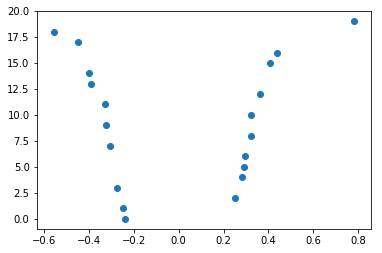

In [69]:
#Obtaining the 20 most important feature weights for LogisticRegression

# w_vals = log_grid.coef_
# log_grid.estimator.steps[1][1].class_weight
learned_weights = log_grid.best_estimator_.steps[1][1].coef_[0]
indices = np.argsort(abs(learned_weights))
plt.scatter(learned_weights[indices][-20:], range(20))

In [3]:
#obtaining the most important feature weights' feature names for LogisticRegression()

cat_features = log_grid.best_estimator_.steps[0][1].named_transformers_["encoder"].get_feature_names()
cont_features = np.array(numeric_list)
feature_list = np.hstack([cat_features, cont_features])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

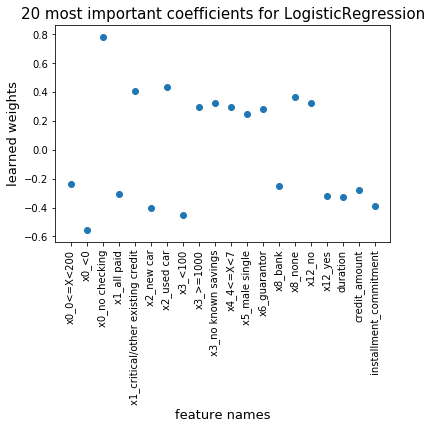

In [134]:
#Plotting the 20 most important features and their weights
f_ind = np.sort(indices[-20:])
plt.scatter(feature_list[f_ind], learned_weights[f_ind])
plt.title('20 most important coefficients for LogisticRegression',fontsize=15)
plt.ylabel('learned weights', fontsize=13)
plt.xlabel('feature names', fontsize=13)
plt.xticks(rotation='vertical')


In [140]:
#Obtaining the 20 most important feature weights for Linear Support Vector Machines

# w_vals = log_grid.coef_
# log_grid.estimator.steps[1][1].class_weight
lin_learned_weights = lin_grid.best_estimator_.steps[1][1].coef_[0]
lin_indices = np.argsort(abs(learned_weights))
#plt.scatter(lin_learned_weights[indices][-20:], range(20))

In [137]:
lin_cat_features = lin_grid.best_estimator_.steps[0][1].named_transformers_["encoder"].get_feature_names()
lin_cont_features = np.array(numeric_list)
lin_feature_list = np.hstack([lin_cat_features, lin_cont_features])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

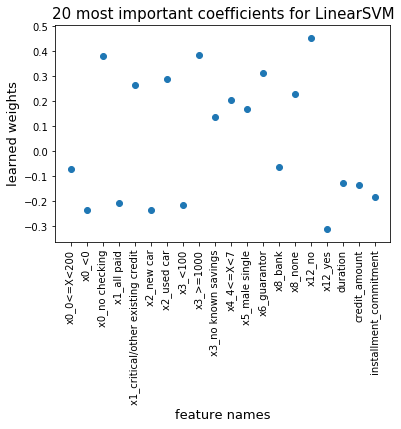

In [139]:
#Plotting the 20 most important features and their weights
lf_ind = np.sort(indices[-20:])
plt.scatter(lin_feature_list[lf_ind], lin_learned_weights[lf_ind])
plt.title('20 most important coefficients for LinearSVM',fontsize=15)
plt.ylabel('learned weights', fontsize=13)
plt.xlabel('feature names', fontsize=13)
plt.xticks(rotation='vertical')


# Overall summary and review of Homework2, Task1

Overall, the decicion on which features are continuous vs. categorical were made based on the encoded dtype. This was checked, and seemed reasonable. The continuous features also seemed reasonable, with some such as number of dependants not being quite as smooth as others. 

The difference in the LogisticRegression model between using a pipeline and pre-processing without the pipeline was very minimal. When scaling the results did not change drasically, however the nearest neighbors classifier notably improved. This makes sense because scaling will have a large impact on the euclidian length. Overall the LinearSVM modeThe processing change that made the largest impact was shuffling when splitting the data. This makes sense because shuffling differently while splitting can affect how many outliers there are in the training vs. the test set. 

